<a href="https://colab.research.google.com/github/hitomitsu50/SportsData_Portfolio/blob/main/2024%E5%B9%B4_Statcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#2025年10月25日 26日

In [60]:
 ! pip install pybaseball japanize_matplotlib

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# 明示的に日本語フォントを設定 (IPAexGothic フォントファイルのパスを指定)
# 利用可能なフォントリストで確認したパスを使用
plt.rcParams['font.family'] = 'sans-serif' # 一般的なフォントファミリーに設定
plt.rcParams['font.sans-serif'] = ['IPAexGothic'] # 具体的なフォントを指定

# 必要に応じて他の設定も追加
# plt.rcParams['axes.unicode_minus'] = False # 負の記号を日本語フォントで表示する場合

In [62]:
!sudo apt-get -y install fonts-ipaexfont-gothic
!sudo apt-get -y install fonts-ipaexfont-mincho
!sudo fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipaexfont-gothic is already the newest version (00401-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipaexfont-mincho is already the newest version (00401-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/ipaexfont-gothic: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/ipaexfont-mincho: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 2 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 1

In [63]:
from pybaseball import statcast
import pandas as pd
import time


In [64]:
import pandas as pd
import glob

# sample_data ディレクトリ内の Statcast CSV ファイルのリストを取得
# ファイル名パターンに合わせて修正してください (例: statcast_YYYY-MM-DD-YYYY-MM-DD.csv)
csv_files_pattern = "sample_data/statcast_*.csv"
csv_files = glob.glob(csv_files_pattern)

# 各CSVファイルを読み込み、データフレームのリストを作成
dfs = []
for file in csv_files:
    try:
        df_month = pd.read_csv(file)
        dfs.append(df_month)
        print(f"{file} を読み込みました。")
    except Exception as e:
        print(f"{file} の読み込み中にエラーが発生しました: {e}")


# 全てのデータフレームを結合
if dfs:
    df_combined = pd.concat(dfs, ignore_index=True)
    # 結合したデータフレームを 'df' 変数に代入
    df = df_combined
    print("全てのデータフレームを結合しました。")
    display(df.head())
    print(f"結合後のデータフレームの行数: {len(df)}")
else:
    print("読み込めるCSVファイルが見つかりませんでした。")

sample_data/statcast_2024-03-20-2024-03-31.csv を読み込みました。
sample_data/statcast_2024-05-01-2024-05-31.csv を読み込みました。
sample_data/statcast_2024-04-01-2024-04-30.csv を読み込みました。
sample_data/statcast_2024-09-01-2024-09-30.csv を読み込みました。
sample_data/statcast_2024-06-01-2024-06-30.csv を読み込みました。
sample_data/statcast_2024-08-01-2024-08-31.csv を読み込みました。
sample_data/statcast_2024-07-01-2024-07-31.csv を読み込みました。
全てのデータフレームを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2024-03-31,95.7,-2.07,6.34,"Ginkel, Kevin",686668,656464,strikeout,swinging_strike,...,1.0,1.15,0.57,0.57,39.4,NaN,NaN,NaN,NaN,NaN
1,SI,2024-03-31,94.6,-1.95,6.30,"Ginkel, Kevin",686668,656464,NaN,foul,...,1.0,1.57,1.18,1.18,46.7,NaN,NaN,NaN,NaN,NaN
2,SL,2024-03-31,88.4,-1.84,6.41,"Ginkel, Kevin",686668,656464,NaN,blocked_ball,...,1.0,3.00,-0.36,-0.36,41.8,NaN,NaN,NaN,NaN,NaN
3,SL,2024-03-31,86.9,-1.92,6.44,"Ginkel, Kevin",686668,656464,NaN,foul,...,1.0,3.29,-0.40,-0.40,41.3,NaN,NaN,NaN,NaN,NaN
4,SI,2024-03-31,94.7,-1.99,6.29,"Ginkel, Kevin",686668,656464,NaN,ball,...,1.0,1.60,1.20,1.20,38.9,NaN,NaN,NaN,NaN,NaN


結合後のデータフレームの行数: 730058


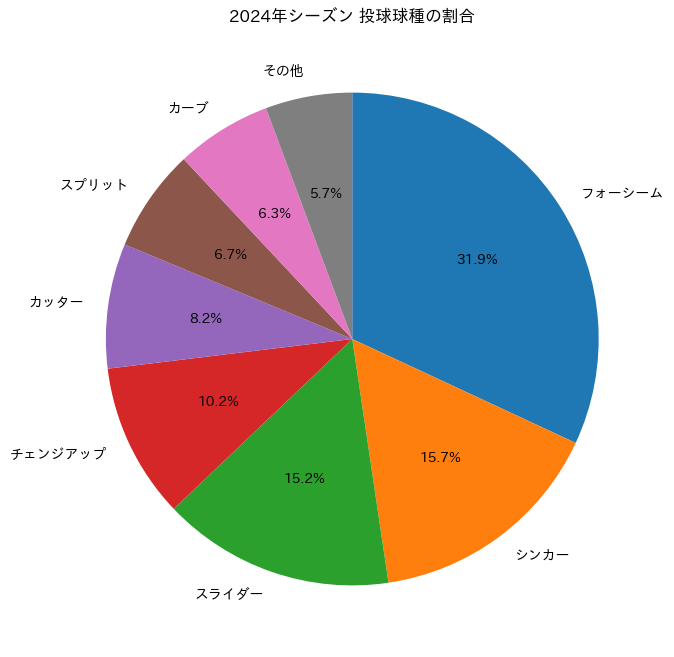

In [65]:
# 数値列をfloat型に変換してから結合 (結合はセル e41356df で完了)
numeric_cols = ['release_speed', 'release_pos_x', 'release_pos_z', 'batter_days_until_next_game',
                'api_break_z_with_gravity', 'api_break_x_arm', 'api_break_x_batter_in', 'arm_angle',
                'attack_angle', 'attack_direction', 'swing_path_tilt',
                'intercept_ball_minus_batter_pos_x_inches', 'intercept_ball_minus_batter_pos_y_inches']

# df はセル e41356df で読み込まれた全データを含むデータフレーム
# 既に結合されているため、再度結合する必要はありません。

# 数値列をfloat型に変換 (結合済みのdfに対して実行)
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


# 球種を日本語に変換
pitch_map={"FF":"フォーシーム","SI":"シンカー","SL":"スライダー","CH":"チェンジアップ","FC":"カッター",
           "ST":"スプリット","CU":"カーブ","FS":"ファストボール","KC":"ナックルカーブ","KN":"ナックルボール"}
df["pitch_type_jp"]=df["pitch_type"].replace(pitch_map)

# 投球数の割合を計算
pitch_counts=df["pitch_type_jp"].value_counts(normalize=True)*100

# 5%未満をその他にまとめる
pitch_counts_grouped=pitch_counts.copy()
pitch_counts_grouped[pitch_counts_grouped<5]=0
others=pitch_counts[pitch_counts_grouped<5].sum()
pitch_counts_grouped=pitch_counts_grouped[pitch_counts_grouped>5]
pitch_counts_grouped["その他"]=others

# 円グラフ表示
plt.figure(figsize=(8,8))
plt.pie(pitch_counts_grouped, labels=pitch_counts_grouped.index,autopct="%1.1f%%",startangle=90, counterclock=False) # counterclock=False を追加
plt.title("2024年シーズン 投球球種の割合")
plt.show()

In [66]:
#2025年10月27日
#欠損値を除外（投手名と奪三振に必要な列があるか確認）
df_pitch=df[df["pitcher"].notnull() & df["events"].notnull()]
#奪三振イベントだけを抽出
#(見逃し三振：”strikeout",空振り三振:"strikeout_double_play")
strikeouts=df_pitch[df_pitch["events"].isin(["strikeout","strikeout_double_play"])]
#投手ごとの奪三振を集計
k_counts=strikeouts["player_name"].value_counts().reset_index()
k_counts.columns=["投手名","奪三振数"]

#上位１０人表示
top10_k=k_counts.head(10)
print(top10_k)

                投手名  奪三振数
0     Skubal, Tarik   234
1       Sale, Chris   231
2     Wheeler, Zack   229
3      Ragans, Cole   228
4      Cease, Dylan   228
5    Gilbert, Logan   227
6  Crochet, Garrett   211
7   Peralta, Freddy   209
8     King, Michael   208
9    Kikuchi, Yusei   207


/tmp/ipython-input-899934328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_k, x="奪三振数",y="投手名",palette="Blues_r")


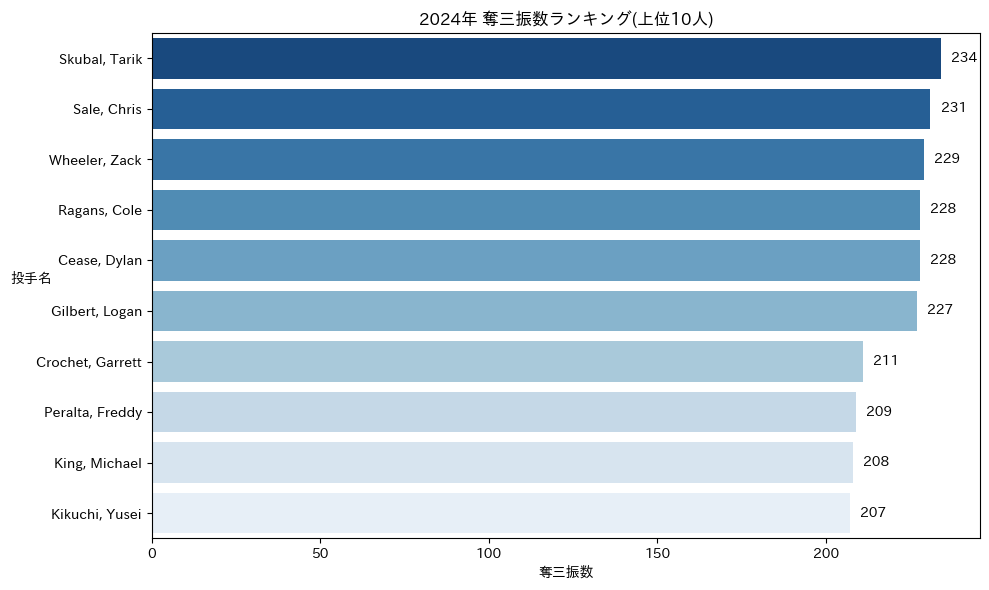

In [70]:
#2025年10月28日
#上位10人の奪三振ランキング（前のコードで取得済）
plt.figure(figsize=(10,6))
sns.barplot(data=top10_k, x="奪三振数",y="投手名",palette="Blues_r")
plt.title("2024年 奪三振数ランキング(上位10人)")
plt.xlabel("奪三振数")
plt.ylabel("投手名",rotation=0)
#奪三振数を棒の先端に表示
for i, value in enumerate(top10_k["奪三振数"]):
  plt.text(value + 3, i, f"{int(value)}",va="center",fontsize=10)
plt.tight_layout()
plt.show()